# ACT DR6 Lensing Power Spectrum

This notebook shows you how to load the ACT lensing power spectrum data and plot it against theory curves.

We import the ACT DR6 lensing likelihood module here. Instructions on how to install it and the associated data can be found here: https://github.com/ACTCollaboration/act_dr6_lenslike

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import act_dr6_lenslike as alens

The data can then be loaded as a dictionary. We will load the `act_extended` variant, but whether you use `act_baseline` or `act_extended`, the full data-set (bandpowers not included in the likelihood analysis) will also be available in the dictionary.

In [2]:
d = alens.load_data('act_extended')

Loading ACT DR6 lensing likelihood v1.2...


/home/msyriac/.venv/lib/python3.11/site-packages/act_dr6_lenslike/act_dr6_lenslike.py:416: UserWarning: Hartlap correction to cinv: 0.9823899371069182
  warnings.warn(f"Hartlap correction to cinv: {hartlap_correction}")


The binned data, the binning matrix and covariance can then be accessed (again, this includes data points not included in the cosmological analysis):

In [3]:
y = d['full_data_binned_clkk_act']
b = d['full_binmat_act']
cov = d['full_act_cov']

If you wanted the trimmed data points, binning matrix and covariance for the variant you specified, you can remove `full_` from the dictionary keys. But here we proceed with the full data-set to plot it against theory.

The bin centers can be obtained from an array of multipoles as follows:

In [4]:
ls = np.arange(b.shape[1])
cents = b @ ls

and the error-bars from the diagonal of the covariance matrix:

In [5]:
errs = np.sqrt(np.diagonal(cov))

We load a theory prediction for the lensing power spectrum based on a Planck 2018 cosmology, and we load lensing noise curves for various experiments:

In [6]:
pls,clpp = np.loadtxt("data/cls_plikHM_TTTEEE_lowl_lowE_dr6_accuracy.txt",usecols=[0,5],unpack=True)
clkk = 0.25 * clpp *2. * np.pi
clkk[pls<2] = 0

lsp1,nlsp1 = np.loadtxt("data/planck_2018_mv_nlkk.dat",unpack=True,usecols=[0,1])
lsp,nlsp = np.loadtxt("data/planck_2022_npipe_mv_N0.dat",unpack=True,usecols=[0,1])
lsa2,nlsa2 = np.loadtxt("data/N_L_kk_act_dr6.txt",unpack=True,usecols=[0,1])
nlsp = 0.25 * nlsp *2. * np.pi / 1e7


We can then get our plot comparing data and theory:

/tmp/ipykernel_29637/2037858920.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


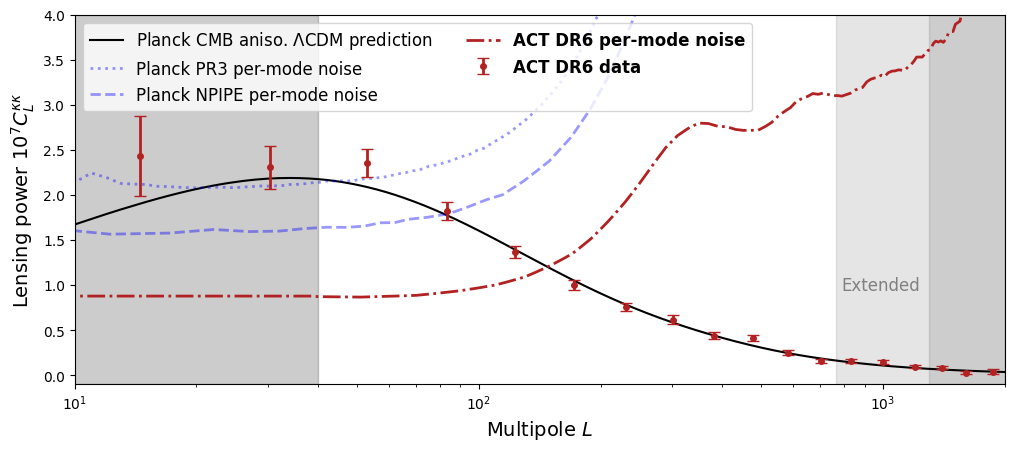

In [7]:
fig=plt.figure(figsize=(12,4.8))
ax= fig.add_subplot(1,1,1)

ax.set_xscale('log') 
ax.set_yscale('linear')
ax.set_xlabel('Multipole $L$',fontsize=14)
ax.set_ylabel(r'Lensing power $10^7C^{\kappa\kappa}_L$',fontsize=14)

ax.plot(pls,clkk * 1e7,color='k',label='Planck CMB aniso. $\Lambda$CDM prediction',linewidth=None)
ax.plot(lsp1,nlsp1*1e7,ls=':',alpha=0.4,color='blue',lw=2,label="Planck PR3 per-mode noise")
ax.plot(lsp,nlsp*1e7,ls='--',alpha=0.4,color='blue',lw=2,label="Planck NPIPE per-mode noise")
ax.plot(lsa2,nlsa2*1e7,ls='-.',color='firebrick',lw=2,label="ACT DR6 per-mode noise")
ax.errorbar(cents,y*1e7,yerr=errs*1e7,color='firebrick',label="ACT DR6 data",capsize=4,zorder=2000,ls='none',marker="o",elinewidth=2,markersize=4,edgecolor=None)

handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, labels,loc='upper left',prop={'size':12},numpoints=1,frameon = 1,bbox_to_anchor=None,ncol=2)

ax.set_xlim(10,2000)
ax.set_ylim(-0.1,4.0)

ax.axvspan(0,40,color='black',alpha=0.2)
ax.axvspan(763,2000,color='black',alpha=0.1)
ax.axvspan(1300,2000,color='black',alpha=0.1)
ax.text(763+50+50+125, 1.0, 'Extended', {'ha': 'center', 'va': 'center' }, rotation=0,color='gray',fontsize=12)

for l in legend.get_texts():
    if 'ACT' in l.get_text():
        l.set_weight('bold')

fig.show()